<a href="https://colab.research.google.com/github/AvinashGadpayle/Wine-Quality-Prediction-using-ML-in-Python-/blob/main/Wine_Quality_Prediction_using_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and explore the dataset

In [2]:
# Load the wine quality dataset
df = pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.shape

(1143, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df=df.drop('total sulfur dioxide',axis=1)

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,1595


In [8]:
df.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
Id                     0
dtype: int64

In [9]:
df.update(df.fillna(df.mean()))

In [10]:
df1 = pd.get_dummies(df,drop_first=True)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,1595


In [11]:
df1['best quality'] = [ 1 if x>=7 else 0 for x in df.quality]
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,2,0
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,3,0
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,1592,0
1139,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6,1593,0
1140,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,1594,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,1595,0


# EDA

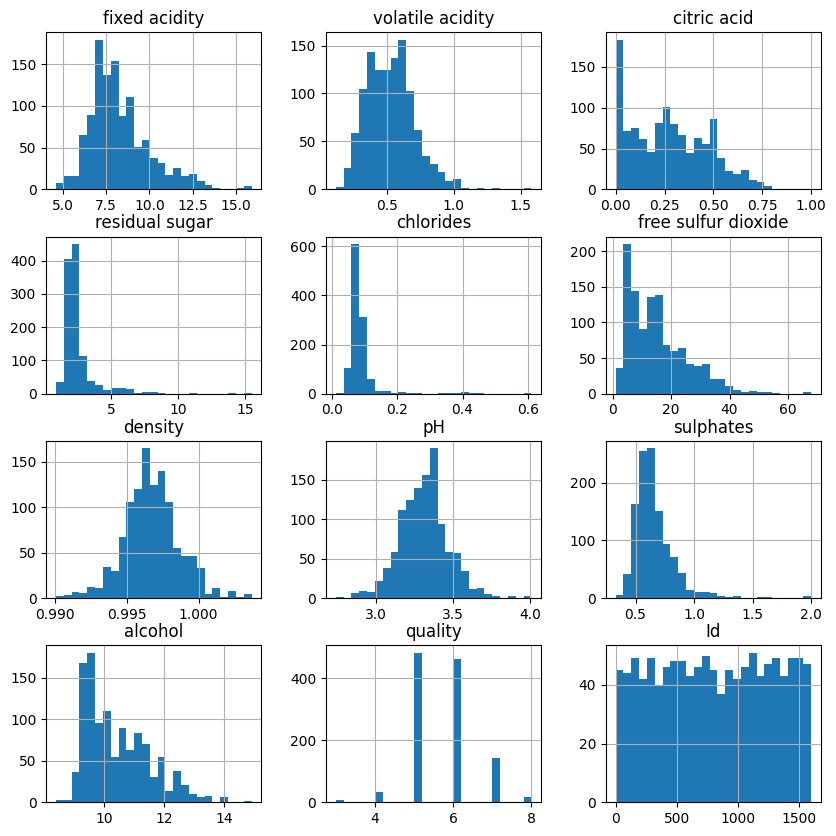

In [12]:
# display histogram
df.hist(bins=25,figsize=(10,10))
plt.show()

<Axes: >

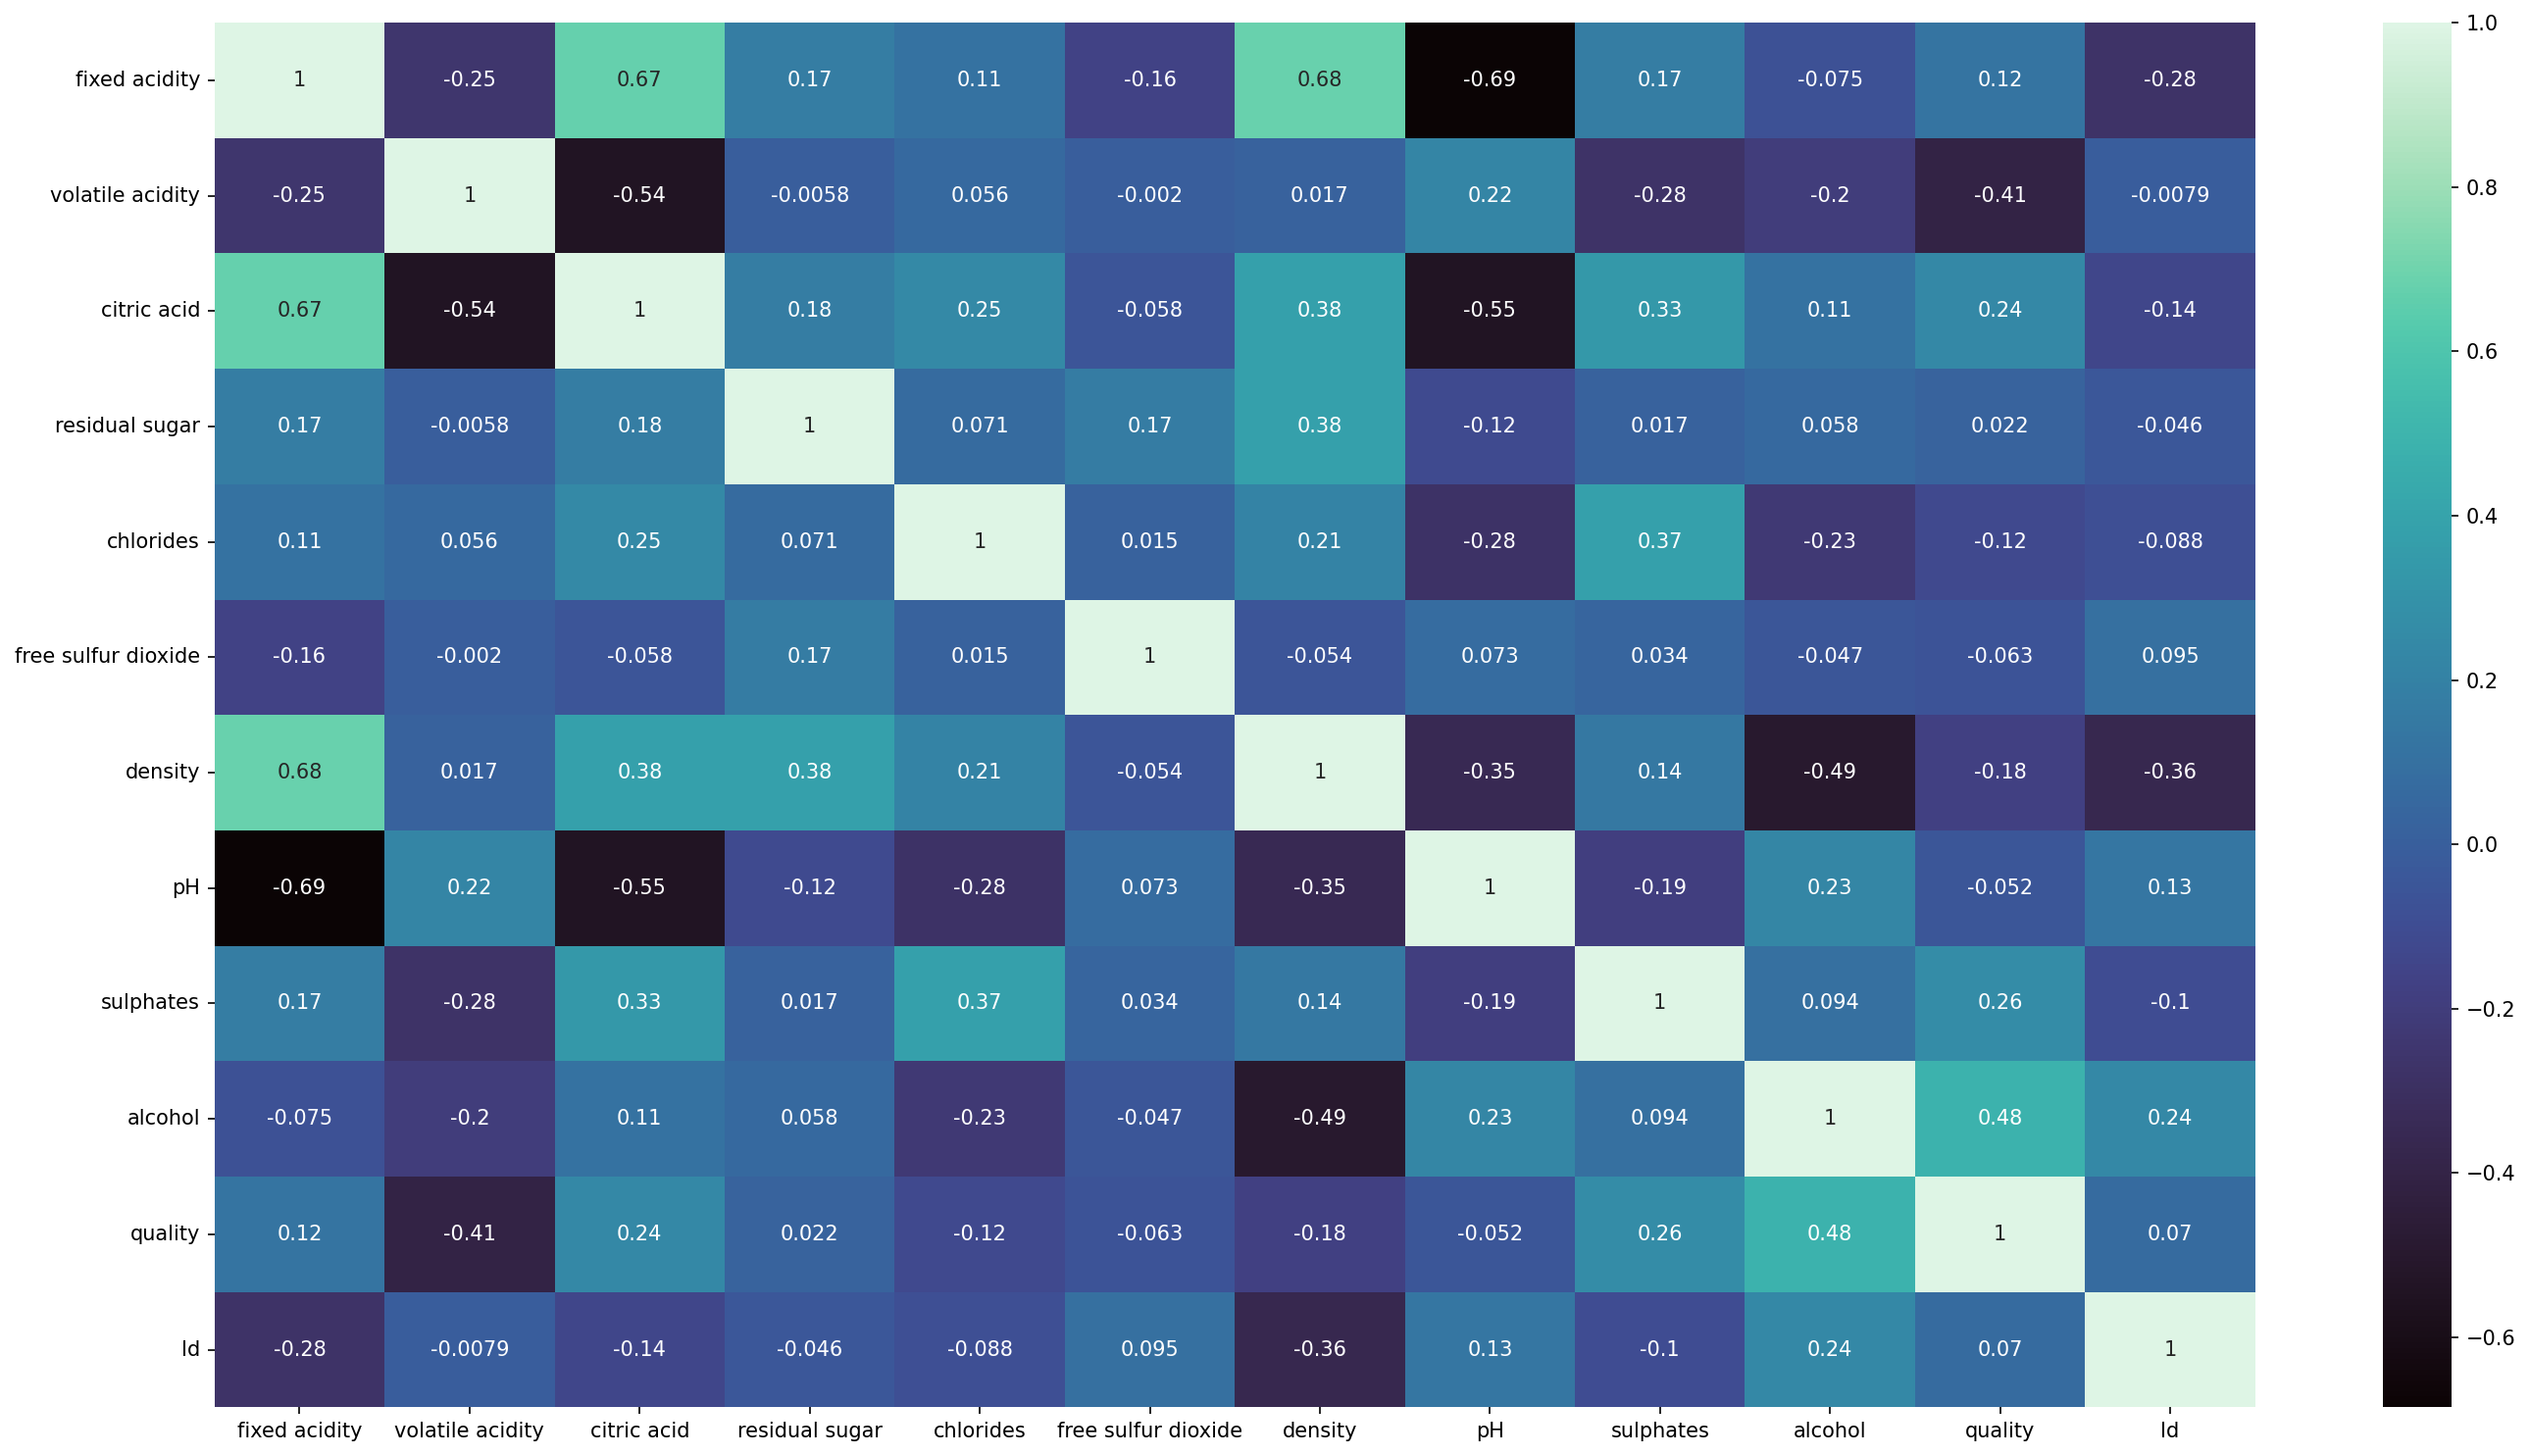

In [13]:
# ploting heatmap for correlection
plt.figure(figsize=(19,10),dpi=150,tight_layout=True)
sns.heatmap(df.corr(),annot=True,cmap="mako")

Text(0, 0.5, 'alcohol')

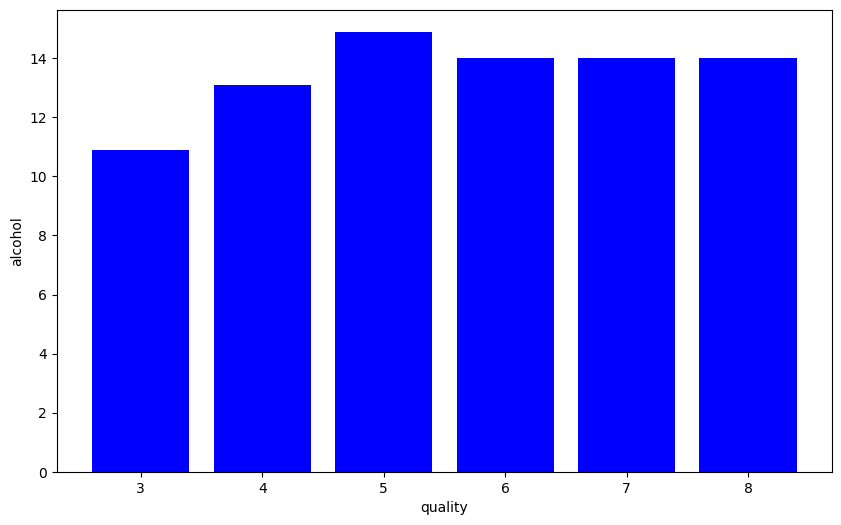

In [14]:
#plot bar graph
plt.figure(figsize=[10,6])
plt.bar(df['quality'],df['alcohol'],color='blue')
plt.xlabel('quality') # label x-axis
plt.ylabel('alcohol') # label y-axis

# Preparing the data

In [15]:
# Separate the features (attributes) and the target (quality) column
X = df1.drop(columns=['quality'])
y = df1['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.preprocessing import MinMaxScaler
# creating normalization object
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(X_train)
new_xtrain = norm_fit.transform(X_train)
new_xtest = norm_fit.transform(X_test)

In [17]:
# Create the Random Forest Classifer
Model = RandomForestClassifier()

# Train the model on the training data
Model.fit(new_xtrain, y_train)

RandomForestClassifier()

In [18]:
#predicting score
Model_score = Model.score(new_xtest,y_test)
print('score of model is : ',Model_score)

score of model is :  0.759825327510917


In [19]:
# display error rate
print('calculating the error')

calculating the error


In [20]:
y_pred = Model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 7, 6, 5, 7, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 6, 5, 7, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 7, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 6, 5, 7, 5, 5, 6, 5, 5, 5, 7, 5, 7,
       7, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5, 7, 5, 6, 5, 5, 5, 7, 6, 5, 5,
       5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 7, 5, 5, 5, 5, 7,
       7, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 5, 5])

In [21]:
# calculating mean squared error
Model_MSE = mean_squared_error(y_test,y_pred)
# calculating root mean squared error
#rnd_RMSE = np.sqrt(RMSE)
# display MSE
print('mean squared error is : ',Model_MSE)
# display RMSE
#print('root mean squared error is : ',rnd_RMSE)
X_pred = list(Model.predict(X_test))
print(classification_report(X_pred,y_test))


mean squared error is :  0.44541484716157204
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.90      0.50      0.64       172
           6       0.18      0.62      0.28        29
           7       1.00      0.93      0.96        28
           8       0.00      0.00      0.00         0

    accuracy                           0.57       229
   macro avg       0.42      0.41      0.38       229
weighted avg       0.82      0.57      0.64       229



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` paramet

In [22]:
predicted_df = {'predicted_values': X_pred, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
158,5,5
1081,5,6
291,5,5
538,5,6
367,5,6
793,7,8
128,5,5
56,5,5
448,5,6
422,5,5


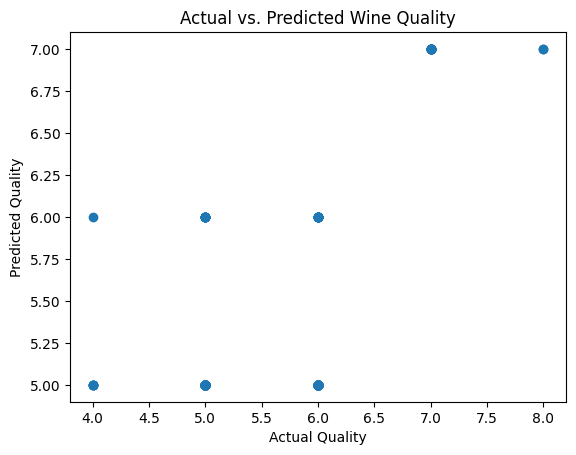

In [23]:
# Visualize the actual vs. predicted wine quality
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Wine Quality')
plt.show()
